# **The Bias-Variance Decomposition**

Let's consider a true population relationship:

`Y = f(X) + ε`

Now we make the assumption that the expected value of the random error term, given that we have a particular sample (X), that is the covariates corresponding to a particular sample is equal to 0.

`E[ε|X] = 0`

Also, givena particular sample or the covariates for a particular sample, the random error term has a constant variance that is given by sigma^2.

`Var[ε|X] = sigma^2`

This implies `f(X) = E[Y|X]`

----

Suppose we build a model `fhat` using the dataset (X, y) where:

X = data matrix

y = response vector

So, the prediction error for the unseen data X can be shown as:

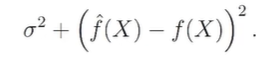

- So, to assess how good the model (`fhat`) is, we fix the design matrix `X`, and we generate the true response vector values `y` several times.

- Then we create a model `fhat` using each dataset (X,y), and calculate the quantity in the previous step for each model.

**How close `fhat(X)` is to f(X) = E[Y|X] represents the `bias`.**

**How much `fhat(X)` varies w.r.t each dataset represents the `variance`.**

-------

Therefore, the `bias=variance decomposition` shows how prediction error changese w.r.t. the training data.

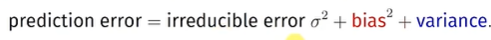

In [ ]:
install.packages(c("ggplot2", "dplyr"))
library(ggplot2)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Generating the predictors
nsamples = 1000
x_1 = rnorm(nsamples, mean = 0, sd = 1)
x_2 = rnorm(nsamples, mean = 0, sd = 1)

In [ ]:
# Function to calculate the true f(x) in the population model
f = function(x_1, x_2){
  return(1+x_1+2*x_2)
}

In [ ]:
# Function to generate population data
genData = function(){
  epsilon = rnorm(nsamples, mean = 0, sd = 5)
  y = f(x_1, x_2) + epsilon
  popData = data.frame(x_1, x_2, y)
  colnames(popData) = c('X_1', 'X_2', 'Y')
  return(popData)
  }

In [ ]:
# Function to calculate and return the error from models built from simulating the population data several times
calcError = function(model, popData){
  # Calculate mean-squared-error
  return(mean((f(popData$X_1, popData$X_2) - predict(model, popData))^2))
}

In [ ]:
# Building the model using several versions of the population data and calculating the prediction error
nsimulations = 500
error = matrix(, nrow = nsimulations, ncol = 3)
for (j in c(1:nsimulations)){
  # Generate population data
  popData = genData()
  # Build using training data the model Y ~ X_1
  model1 = lm(data = popData, Y ~ X_1)

  # Build using training data the model Y ~ X_1 + X_2
  model2 = lm(data = popData, Y ~ X_1 + X_2)

  # Build using training data the model
  # Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2) +...+ I(X_1^4)+I(X_2^4)
  model3 = lm(data = popData, Y ~ X_1 + X_2 + I(X_1^2) +   I(X_2^2)+ I(X_1^3) + I(X_2^3) + I(X_1^4) + I(X_2^4))

  # Calculate MSE of models
  error[j, 1] = calcError(model1, popData)
  error[j, 2] = calcError(model2, popData)
  error[j, 3] = calcError(model3, popData)
}

In [ ]:
summary(model1)


Call:
lm(formula = Y ~ X_1, data = popData)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1697  -3.5993  -0.2635   3.5535  17.3760 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3315     0.1629   8.174 9.00e-16 ***
X_1           1.1292     0.1625   6.950 6.57e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.151 on 998 degrees of freedom
Multiple R-squared:  0.04617,	Adjusted R-squared:  0.04521 
F-statistic: 48.31 on 1 and 998 DF,  p-value: 6.574e-12


In [ ]:
summary(model2)


Call:
lm(formula = Y ~ X_1 + X_2, data = popData)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6510  -3.3559  -0.0794   3.2755  16.5846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3240     0.1551   8.536  < 2e-16 ***
X_1           1.1468     0.1547   7.412 2.65e-13 ***
X_2           1.6029     0.1574  10.183  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.905 on 997 degrees of freedom
Multiple R-squared:  0.136,	Adjusted R-squared:  0.1343 
F-statistic: 78.48 on 2 and 997 DF,  p-value: < 2.2e-16


In [ ]:
summary(model3)


Call:
lm(formula = Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2) + I(X_1^3) + 
    I(X_2^3) + I(X_1^4) + I(X_2^4), data = popData)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4773  -3.3397  -0.1741   3.2619  16.5861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.461813   0.272344   5.368 9.94e-08 ***
X_1          1.340824   0.254408   5.270 1.67e-07 ***
X_2          1.238227   0.255953   4.838 1.52e-06 ***
I(X_1^2)    -0.091174   0.258895  -0.352   0.7248    
I(X_2^2)    -0.069802   0.245880  -0.284   0.7766    
I(X_1^3)    -0.068775   0.070174  -0.980   0.3273    
I(X_2^3)     0.123306   0.067527   1.826   0.0681 .  
I(X_1^4)     0.014484   0.041730   0.347   0.7286    
I(X_2^4)    -0.004565   0.038298  -0.119   0.9051    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 991 degrees of freedom
Multiple R-squared:  0.1409,	Adjusted R-squared:  0.1339 
F-statistic: 20.31 on 8 and 991 DF, 

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


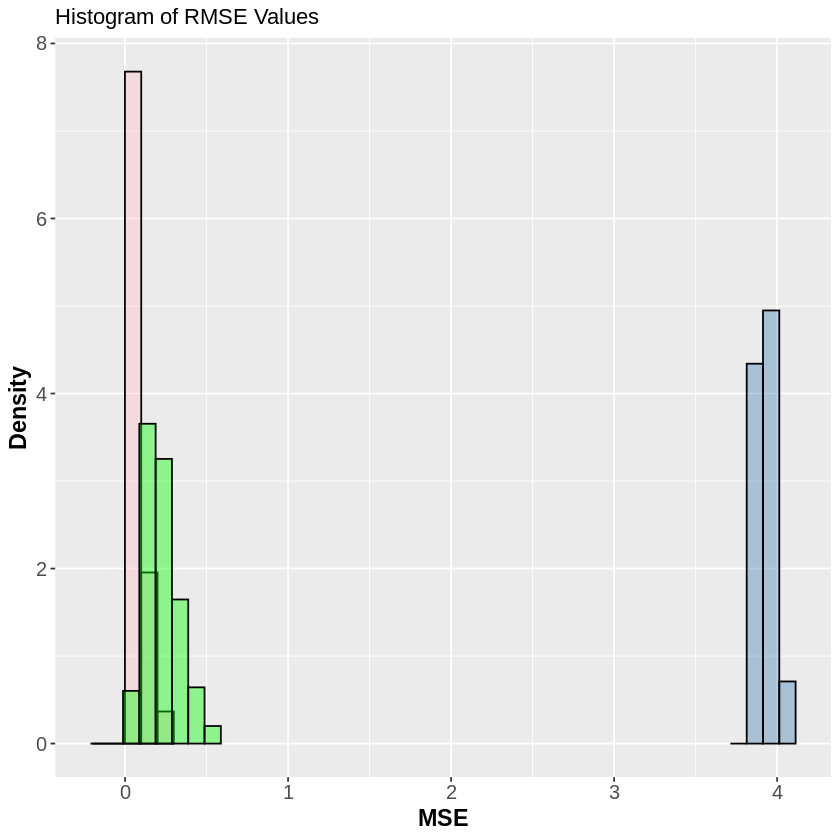

In [ ]:
# Making a histogram of the errors
dfError = as.data.frame(error)
colnames(dfError) = c('Error1', 'Error2', 'Error3')
mu1 = mean(dfError$Error1)
sigma1 = sd(dfError$Error1)
mu2 = mean(dfError$Error2)
sigma2 = sd(dfError$Error2)
mu3 = mean(dfError$Error3)
sigma3 = sd(dfError$Error3)
delta = 0.1 # bin width for histogram
ggplot(data = dfError) +
  geom_histogram(aes(x = Error1, y = ..density..),
  breaks = seq(mu1-4*sigma1, mu1+4*sigma1, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  geom_histogram(aes(x = Error2, y = ..density..),
  breaks = seq(mu2-4*sigma2, mu2+4*sigma2, by = delta),
  colour = 'black', fill = 'pink', alpha = 0.4) +
  geom_histogram(aes(x = Error3, y = ..density..),
  breaks = seq(mu3-4*sigma3, mu3+4*sigma3, by = delta),
  colour = 'black', fill = 'green', alpha = 0.4) +
  labs(x = 'MSE', y = 'Density')+
  ggtitle('Histogram of RMSE Values') +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))